# Projeto 1 

O projeto tem o objetivo de classificar os vinhos entre vermelho e branco.

In [1]:
#--- Bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#--- Configurações adicionais

plt.style.use("seaborn-muted")
%matplotlib inline
pd.set_option('display.max_columns', None)

## 1. Concatenando os bancos de dados

In [2]:
banco_red = pd.read_csv("data/winequality-red.csv", sep = ";")
banco_white = pd.read_csv("data/winequality-white.csv", sep = ";")

banco_red["classification"] = 0
banco_white["classification"] = 1

banco = pd.concat([banco_red, banco_white], axis = 0)

In [3]:
banco.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,classification
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


## 2. Análise Exploratória

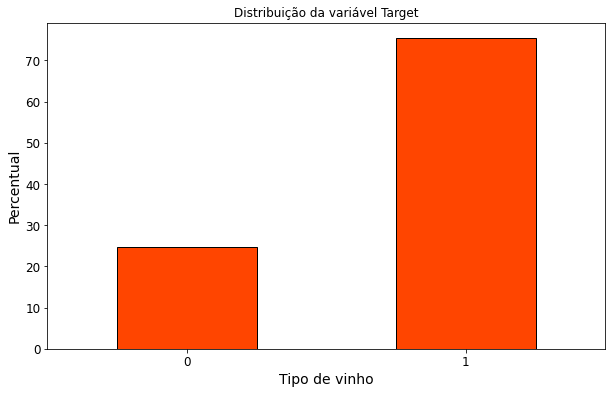

In [4]:
plt.figure(figsize = [10, 6])

banco["classification"].value_counts(normalize = True).mul(100).round(2).sort_values().plot(kind = "bar", color = "orangered", edgecolor = "black")

plt.title(label = "Distribuição da variável Target")
plt.xlabel("Tipo de vinho", fontsize = 14, color = "black")
plt.ylabel("Percentual", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")
plt.xticks(rotation = 0)
plt.show()

In [5]:
banco.drop(["classification", "quality"], axis = 1).describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.22,1.30,3.80,6.40,7.00,7.70,15.90
volatile acidity,6497.0,0.34,0.16,0.08,0.23,0.29,0.40,1.58
citric acid,6497.0,0.32,0.15,0.00,0.25,0.31,0.39,1.66
residual sugar,6497.0,5.44,4.76,0.60,1.80,3.00,8.10,65.80
chlorides,6497.0,0.06,0.04,0.01,0.04,0.05,0.06,0.61
free sulfur dioxide,6497.0,30.53,17.75,1.00,17.00,29.00,41.00,289.00
total sulfur dioxide,6497.0,115.74,56.52,6.00,77.00,118.00,156.00,440.00
density,6497.0,0.99,0.00,0.99,0.99,0.99,1.00,1.04
pH,6497.0,3.22,0.16,2.72,3.11,3.21,3.32,4.01
sulphates,6497.0,0.53,0.15,0.22,0.43,0.51,0.60,2.00


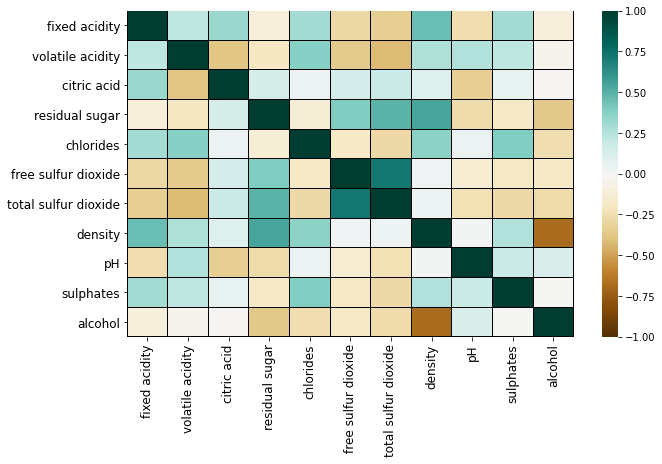

In [6]:
corr_var_quant = banco.drop(["classification", "quality"], axis = 1).corr()

plt.figure(figsize = [10, 6])
sns.heatmap(data = corr_var_quant, vmin = -1, vmax = 1, linewidths = 0.01, linecolor = "black", cmap = "BrBG")
plt.xlabel("", fontsize = 14, color = "black")
plt.ylabel("", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")
plt.show()

In [7]:
banco["quality"].value_counts(normalize = True).mul(100).round(2)

6    43.65
5    32.91
7    16.61
4     3.32
8     2.97
3     0.46
9     0.08
Name: quality, dtype: float64

## 3. Modelagem